In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt


In [3]:
#%%
def rgb_to_hsv(im):
    
    r, g, b = im[:,:,0]/255.0, im[:,:,1]/255.0, im[:,:,2]/255.0
    mx = im[:,:,0:3].max(axis=2)/255.0
    mn = im[:,:,0:3].min(axis=2)/255.0
    df = mx-mn
    
    h = s = np.zeros(mx.shape)
    h[mx == r] = ((60 * ((g-b)/df) + 360) % 360)[mx == r]
    h[mx == g] = ((60 * ((b-r)/df) + 120) % 360)[mx == g]
    h[mx == b] = ((60 * ((r-g)/df) + 240) % 360)[mx == b]
    h[mx == mn] = 0
    
    s = (df/mx)*255
    s[mx == 0] = 0
    v = mx*255
    hsvim = np.stack([h, s, v], axis=2).reshape((im[:,:,0].shape[0], im[:,:,0].shape[1], 3))
    hsvim = np.round(hsvim).astype(int)
    return hsvim



<IPython.core.display.Javascript object>


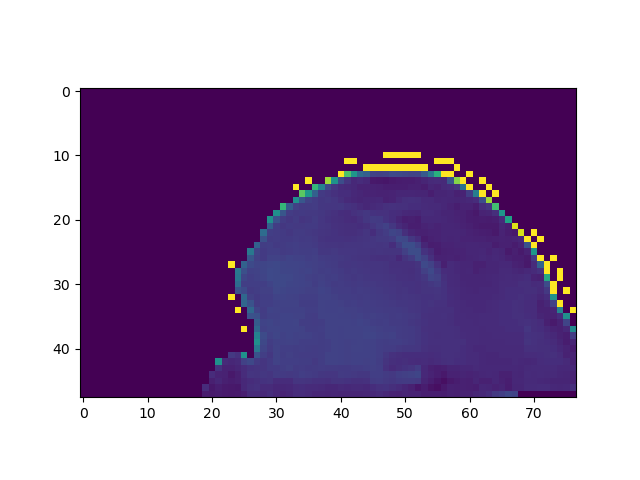

In [4]:
#%%
img = PIL.Image.open('/home/intern/下載/old data/real_PPE-data/train/images/output.png')
im0 = np.array(img)
plt.imshow(im0[:,:,0:3])
plt.show()


In [5]:
hsvim = rgb_to_hsv(im0[:,:,0:3])
plt.imshow(hsvim[:,:,1])
plt.show()
print("1")

1


/tmp/ipykernel_10926/1291202639.py:10: RuntimeWarning: invalid value encountered in divide
  h[mx == r] = ((60 * ((g-b)/df) + 360) % 360)[mx == r]
/tmp/ipykernel_10926/1291202639.py:11: RuntimeWarning: invalid value encountered in divide
  h[mx == g] = ((60 * ((b-r)/df) + 120) % 360)[mx == g]
/tmp/ipykernel_10926/1291202639.py:12: RuntimeWarning: invalid value encountered in divide
  h[mx == b] = ((60 * ((r-g)/df) + 240) % 360)[mx == b]
/tmp/ipykernel_10926/1291202639.py:15: RuntimeWarning: invalid value encountered in divide
  s = (df/mx)*255


<IPython.core.display.Javascript object>


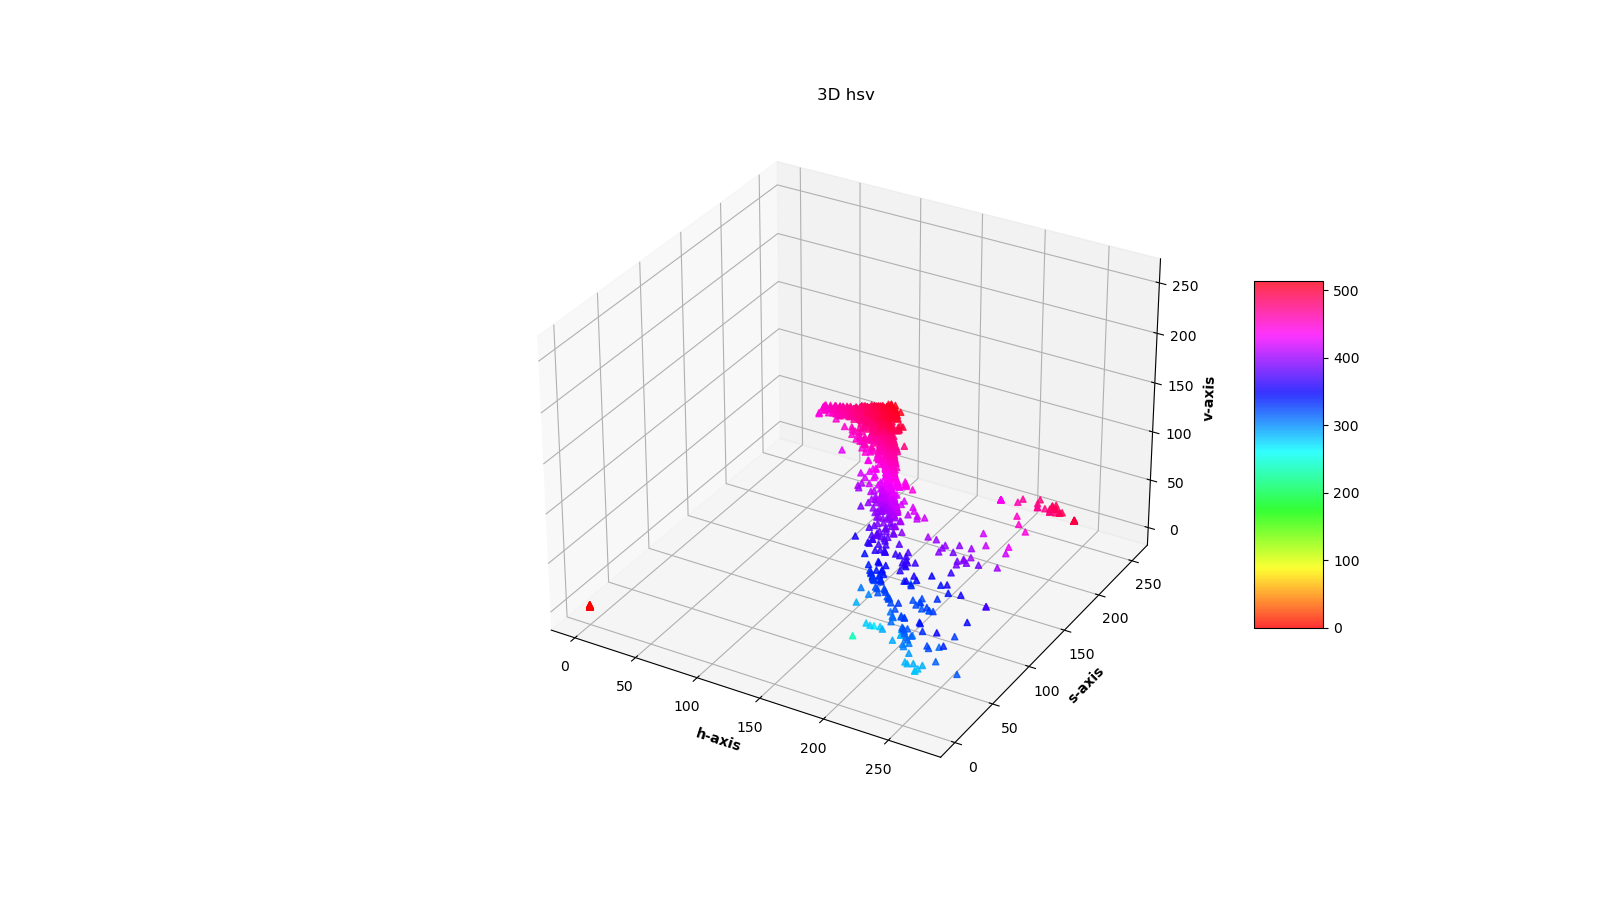

In [6]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
z = hsvim[:,:,2]
x = hsvim[:,:,0]
y = hsvim[:,:,1]
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.1)
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap,
                    marker ='^')

# plotting

ax.set_title('3D hsv')
ax.set_xlabel('h-axis', fontweight ='bold')
ax.set_ylabel('s-axis', fontweight ='bold')
ax.set_zlabel('v-axis', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
plt.show()

In [7]:
height = hsvim[:,:,0].shape[0]
weight = hsvim[:,:,0].shape[1]
X = hsvim.reshape((height * weight, 3))
x = np.all(X,axis=1)
X = X[x,:]

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


/media/intern/6bf406ea-c22f-457e-bdbc-47701a7188a4/home/anaconda3/envs/intern/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<IPython.core.display.Javascript object>


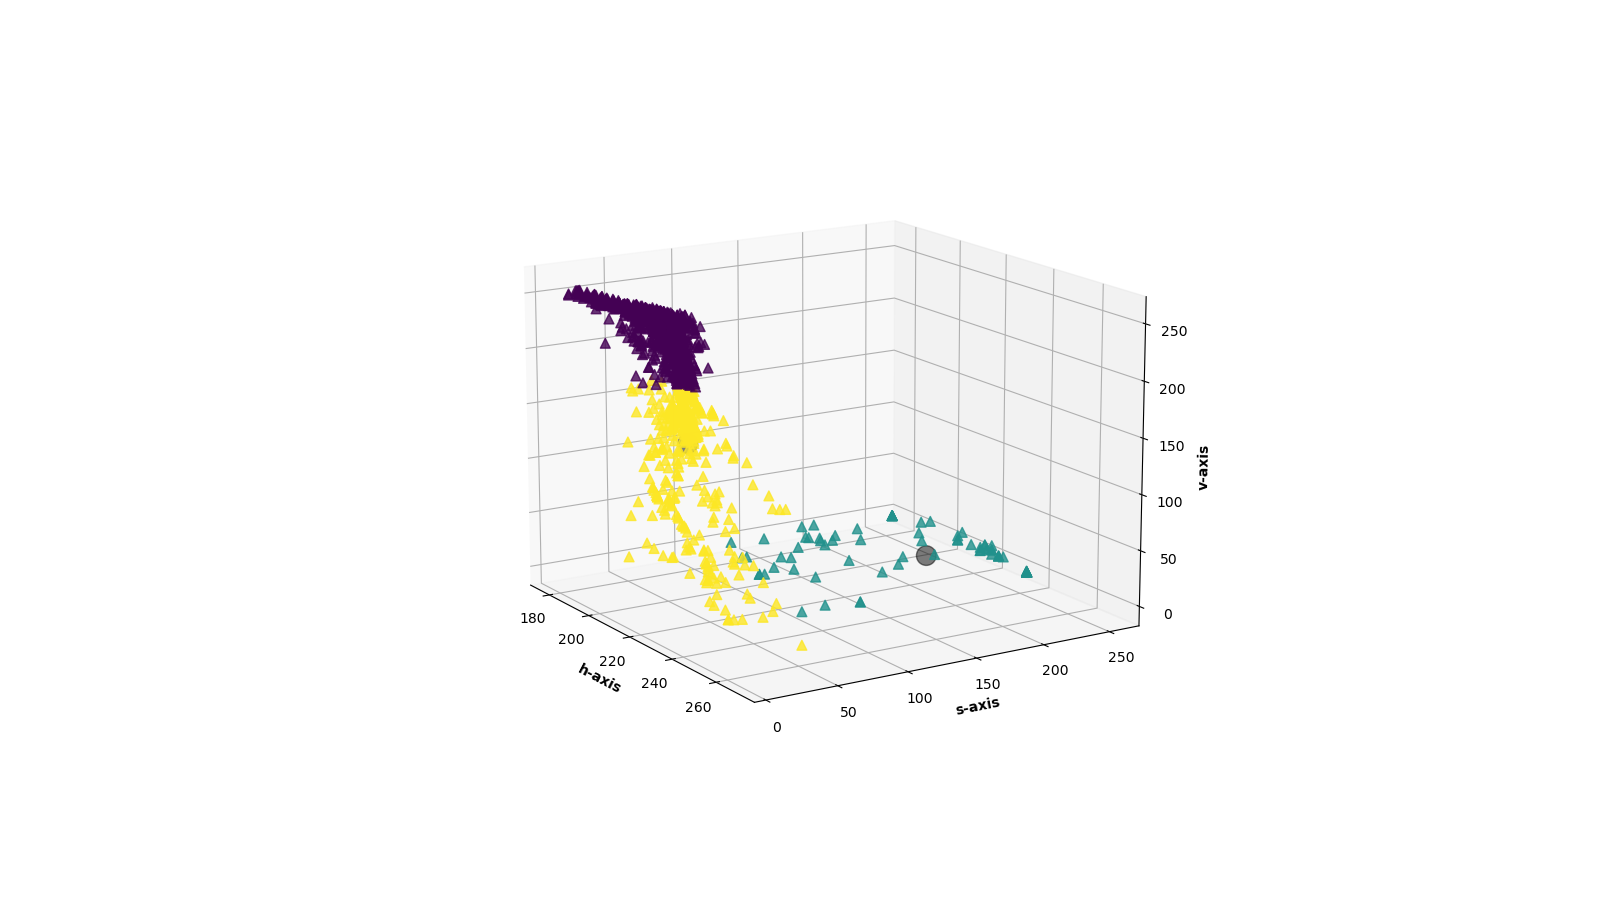

In [10]:
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2],alpha = 0.8,
                    marker ='^', c=y_kmeans, s=50, cmap='viridis')
ax.set_xlabel('h-axis', fontweight ='bold')
ax.set_ylabel('s-axis', fontweight ='bold')
ax.set_zlabel('v-axis', fontweight ='bold')

centers = kmeans.cluster_centers_

In [11]:
ax.scatter3D(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

In [54]:
fig.savefig('test.png')